# Import libraries


In [ ]:
from keras.models import load_model
import tensorflow as tf
from google.colab import drive
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Colab connection

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading model


Change the first part of the path

In [ ]:
model = load_model('/content/drive/Shareddrives/Machine_Learning/23/final_model')
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv_1 (TFOpLamb  (None, 224, 224, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_1 (TFOpLam  (None, 224, 224, 3)      0         
 bda)                                                            
                                                                 
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 50176)             0         
                                                           

# Predict function


In [ ]:
def predict(X):
  new_width = 224
  new_height = 224
  batch = tf.image.resize(X,[new_width,new_height],method='nearest')
  predictions = model.predict(batch)
  return predictions

# Extra code: predict function testing

Found 1305 images belonging to 3 classes.
(1305, 512, 512, 3)
(1305, 3)
Confusion Matrix


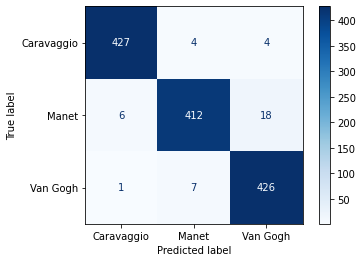

In [ ]:
WIDTH = 512
HEIGHT = 512
BATCH_SIZE = 1305
val_dir = '/content/drive/Shareddrives/Machine_Learning/23/Dataset/Validation'

gen = ImageDataGenerator()
generator = gen.flow_from_directory(
    val_dir,
    target_size=(WIDTH,HEIGHT),  # resize the image in order to match the network input size
    batch_size=BATCH_SIZE,
    class_mode='categorical')

X, Y = generator.next()
print(X.shape)

predictions = predict(X)
print(predictions.shape)

Y_pred = np.argmax(predictions, axis=1)
Y_true = np.argmax(Y,axis=1)
target_names = ['Caravaggio', 'Manet', 'Van Gogh']
print('Confusion Matrix')
matrix = confusion_matrix(Y_true,Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=target_names)

disp.plot(cmap=plt.cm.Blues)
plt.show()



